In [1]:
#Importing the required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
# Loading the loan data
file=('./Decision_Tree_ Dataset.csv')
data=pd.read_csv(file,sep=',',header= 0)

In [3]:
#Readng the data
data.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [4]:
#Checking the length and shape of data
print("Loan dataset length is:", len(data))
print("Loan dataset shape is:",data.shape)

Loan dataset length is: 1000
Loan dataset shape is: (1000, 6)


In [5]:
#Changing the column names
column_name= {"1":"initial_payment","2":"last_payment","3":"credit_score",
 "4":"house_number","sum":"sum" ,"Unnamed: 5":"result"}
data.rename(index = str, columns = column_name, inplace = True)

In [6]:
#dropping unwanted columns
data=data.drop(columns='sum')

In [7]:
data.head()

,initial_payment,last_payment,credit_score,house_number,result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [8]:
#Now lets seperate the target variable
X= data.values[:,0:3]
Y= data.values[:,4]

In [9]:
#Splitting data into Test and Train
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
#Function to perform training with entropy
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

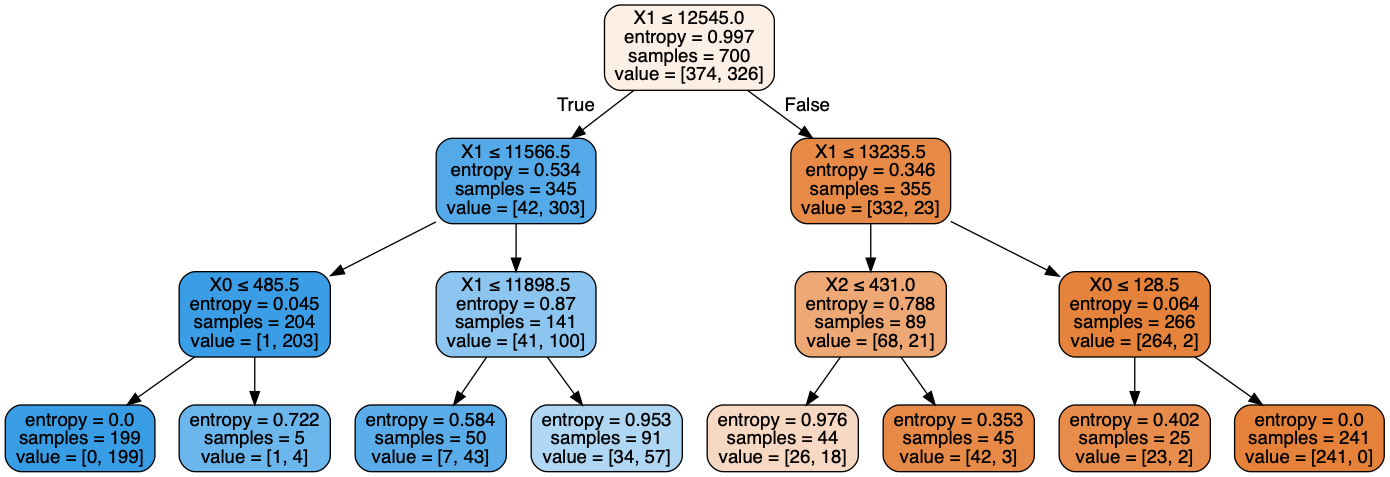

In [10]:
#Decision tree viz
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
#To make prediction
y_pred= clf_entropy.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',

In [12]:
#Confusion matrix
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,No,yes
Actual,,
No,121,26
yes,6,147


In [13]:
#To check accuracy
print("Accuracy score is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is: 89.33333333333333 %
